In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

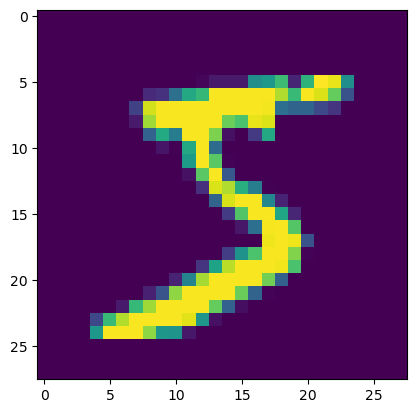

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train=X_train/255

In [7]:
X_test=X_test/255 #scale data

In [8]:
# Create the model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [10]:
28*28

784

In [11]:
784/2

392.0

In [13]:
X_train[0].shape

(28, 28)

In [15]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28])) #Flatten to have 784
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200, activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [16]:
25/784

0.03188775510204082

In [24]:
decoder=Sequential() #Mirror encoder
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(784,activation="sigmoid")) #we are checking if final image looks like initial model
decoder.add(Reshape([28,28]))

In [25]:
autoencoder=Sequential([encoder,decoder])

In [26]:
autoencoder.compile(loss="binary_crossentropy", optimizer=SGD(lr=1.5), metrics=["accuracy"])

C:\Users\17573\anaconda3\envs\myenv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=[X_test,X_test])#Checks if image number one from first is equel to sesond X_train

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2527 - accuracy: 0.0840 - val_loss: 0.2137 - val_accuracy: 0.1237
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1855 - accuracy: 0.1631 - val_loss: 0.1697 - val_accuracy: 0.1790
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1580 - accuracy: 0.1999 - val_loss: 0.1483 - val_accuracy: 0.2062
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1466 - accuracy: 0.2169 - val_loss: 0.1424 - val_accuracy: 0.2197
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1411 - accuracy: 0.2258 - val_loss: 0.1381 - val_accuracy: 0.2242


In [28]:
passed_images=autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 146ms/step


Original Image


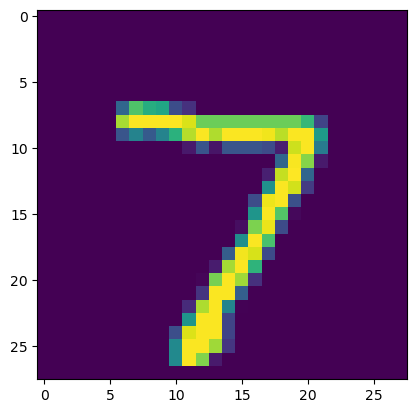

Attempted Reconstruction (after autoencoder)


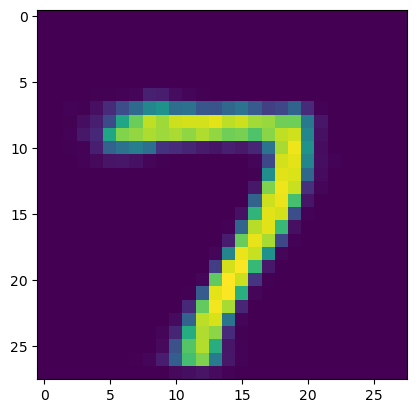

In [29]:
n=0

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted Reconstruction (after autoencoder)")
plt.imshow(passed_images[n])


# Denoising images

In [31]:
#add noise to images, we'll make it part of autoencoder

In [32]:
from tensorflow.keras.layers import GaussianNoise
sample=GaussianNoise(0.2)
noisey=sample(X_test[:10],training=True)

Original


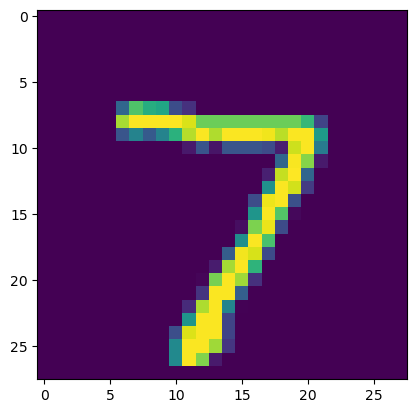

NOISE VERSION


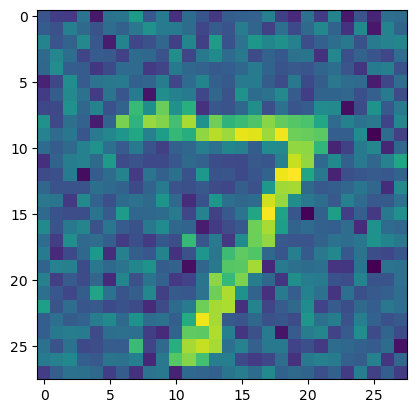

In [33]:
n=0
print("Original")
plt.imshow(X_test[n])
plt.show()
print("NOISE VERSION")
plt.imshow(noisey[n])
plt.show()

In [38]:
import tensorflow as tf

In [41]:
tf.random.set_seed(101)
np.random.seed(101)

encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28])) #Flatten to have 784

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200, activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [42]:
decoder=Sequential() #Mirror encoder
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(784,activation="sigmoid")) #we are checking if final image looks like initial model
decoder.add(Reshape([28,28]))

In [43]:
noise_remover=Sequential([encoder,decoder])

In [45]:
noise_remover.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [46]:
noise_remover.fit(X_train,X_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1672 - accuracy: 0.1867
Epoch 2/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1282 - accuracy: 0.2342
Epoch 3/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1204 - accuracy: 0.2484
Epoch 4/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1152 - accuracy: 0.2562
Epoch 5/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1115 - accuracy: 0.2629
Epoch 6/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1085 - accuracy: 0.2688
Epoch 7/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1062 - accuracy: 0.2731
Epoch 8/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1044 - accuracy: 0.2776


In [53]:
ten_noisey_images=sample(X_test[:10],training=True)


In [54]:
denoised=noise_remover(ten_noisey_images)

Original Image


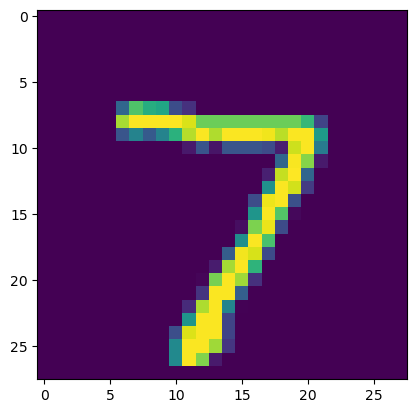

Noise Added Image


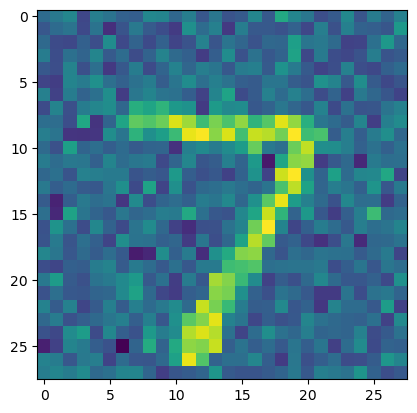

After Noise Removal From Autoencoder


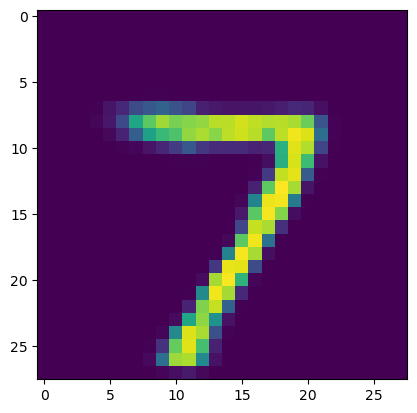

In [55]:
n=0
print("Original Image")
plt.imshow(X_test[0])
plt.show()
print("Noise Added Image")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After Noise Removal From Autoencoder") 
plt.imshow(denoised[n])
plt.show()

In [56]:
#The autoencoder is structured in shuch way that when decoding we apply noise second time, this double it before decoding